In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Missing values in train dataset: id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
Missing values in test dataset: id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
Missing values in stores dataset: store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
Data types and statistical summary of train dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 137.4+ MB
None
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00


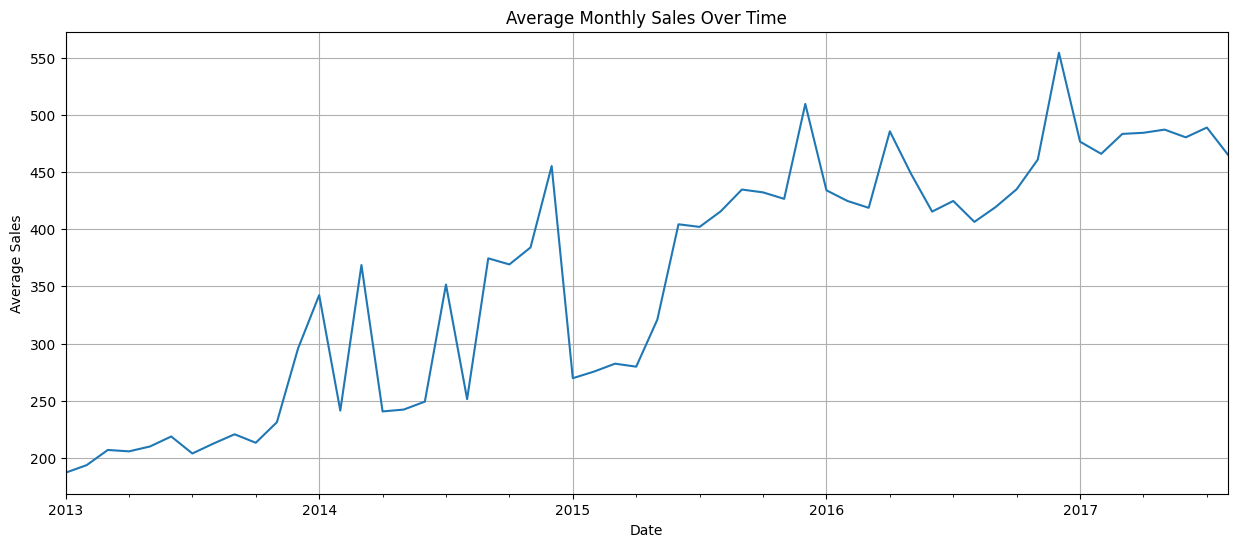

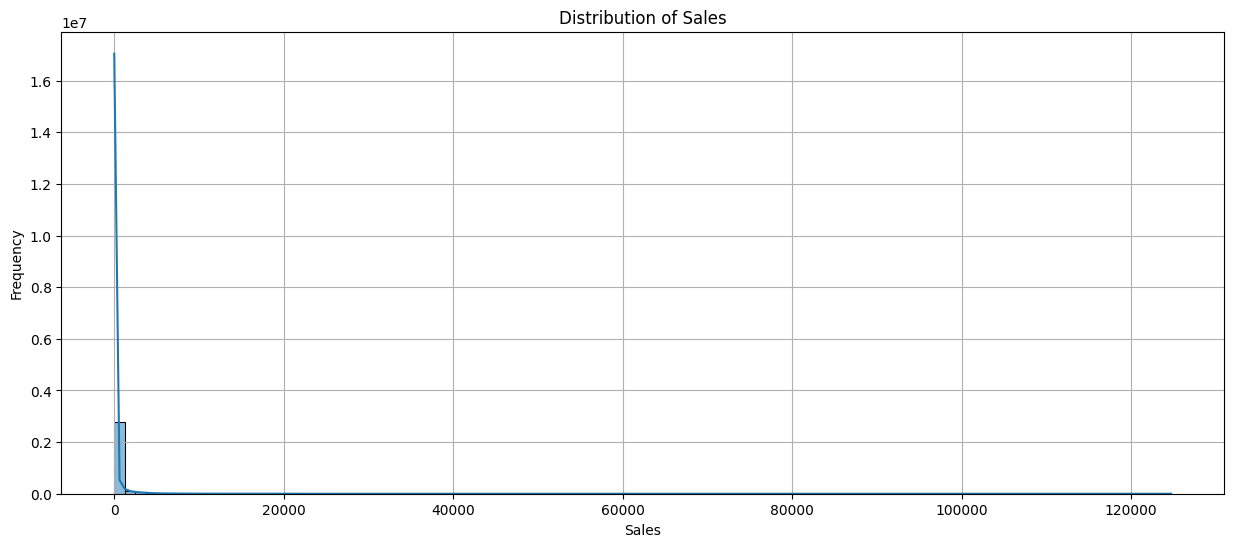

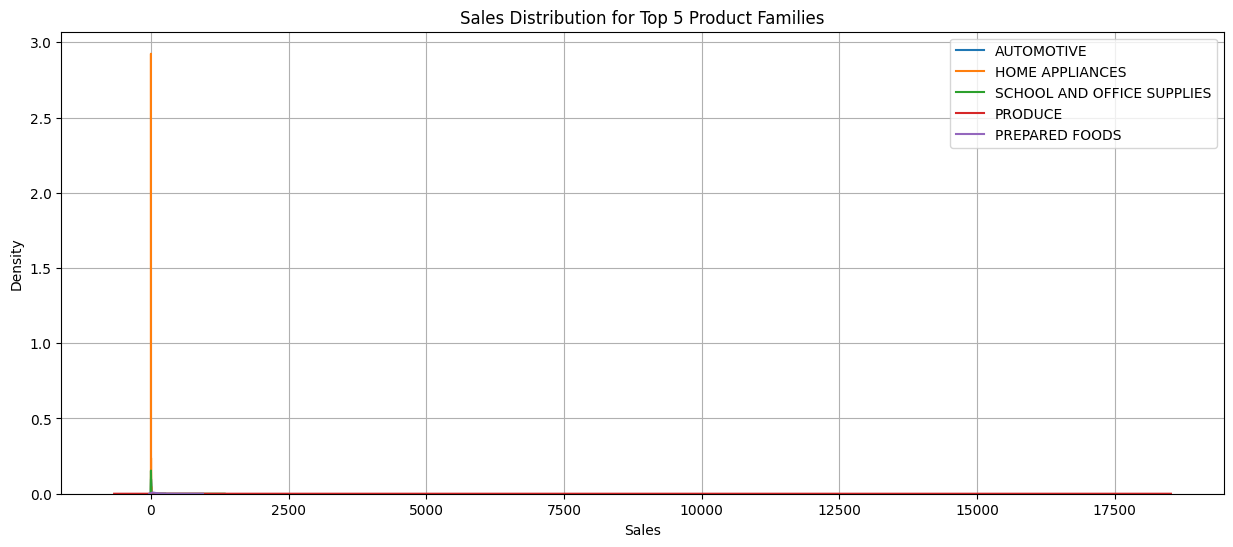

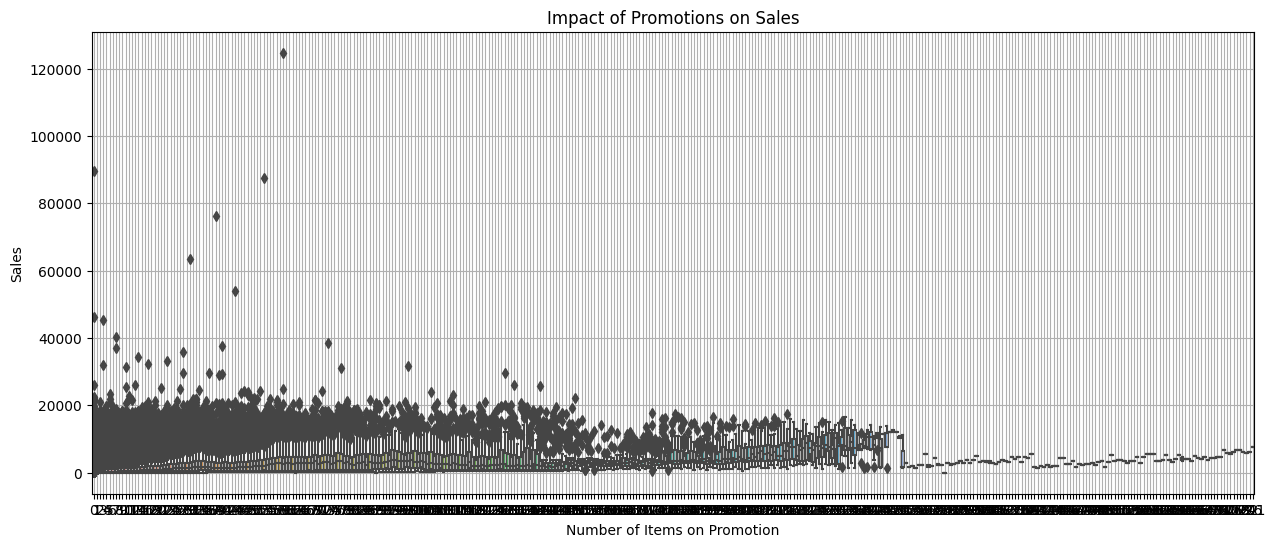

NameError: name 'train_df' is not defined

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns #visualisation
df_holiday=pd.read_csv('/kaggle/input/Store-Sales-Forecasting/holidays_events.csv')
df_oil=pd.read_csv('/kaggle/input/Store-Sales-Forecasting/oil.csv')
df_stores=pd.read_csv('/kaggle/input/Store-Sales-Forecasting/stores.csv')
df_test=pd.read_csv('/kaggle/input/Store-Sales-Forecasting/test.csv')
df_train=pd.read_csv('/kaggle/input/Store-Sales-Forecasting/train.csv')
df_transactions=pd.read_csv('/kaggle/input/Store-Sales-Forecasting/transactions.csv')
# Convert 'date' to datetime in train and test datasets
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.set_index('date', inplace=True)
df_test['date'] = pd.to_datetime(df_test['date'])

# Check for missing values
print("Missing values in train dataset:", df_train.isnull().sum())
print("Missing values in test dataset:", df_test.isnull().sum())
print("Missing values in stores dataset:", df_stores.isnull().sum())
# Check data types and look for potential outliers in train dataset
print("Data types and statistical summary of train dataset:")
print(df_train.info())
print(df_train.describe())
# EDA: Sales Over Time
plt.figure(figsize=(15, 6))
df_train['sales'].resample('M').mean().plot()
plt.title('Average Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()
# Distribution of Sales
plt.figure(figsize=(15, 6))
sns.histplot(df_train['sales'], bins=100, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Distribution of Sales for Top 5 Families
top_families = df_train['family'].value_counts().index[:5]
plt.figure(figsize=(15, 6))
for family in top_families:
    subset = df_train[df_train['family'] == family]
    sns.kdeplot(subset['sales'], label=family)
plt.title('Sales Distribution for Top 5 Product Families')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
# Impact of Promotions on Sales
plt.figure(figsize=(15, 6))
sns.boxplot(x='onpromotion', y='sales', data=df_train)
plt.title('Impact of Promotions on Sales')
plt.xlabel('Number of Items on Promotion')
plt.ylabel('Sales')
plt.grid(True)
plt.show()
# Continuing EDA
# Check if 'date' is already the index
if 'date' in train_df.columns:
    df_train['date'] = pd.to_datetime(df_train['date'])
    df_train.set_index('date', inplace=True)

# Distribution of Sales across different Stores
plt.figure(figsize=(15, 6))
sns.boxplot(x='store_nbr', y='sales', data=df_train.reset_index())
plt.title('Sales Distribution Across Different Stores')
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Distribution of Sales across different Product Families
plt.figure(figsize=(15, 6))
sns.boxplot(x='family', y='sales', data=df_train.reset_index())
plt.title('Sales Distribution Across Different Product Families')
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

# Impact of Promotions on Sales
# Create a new column to categorize days as 'Promotion' or 'No Promotion'
df_train['promotion_category'] = df_train['onpromotion'].apply(lambda x: 'Promotion' if x > 0 else 'No Promotion')

plt.figure(figsize=(15, 6))
sns.boxplot(x='promotion_category', y='sales', data=df_train.reset_index())
plt.title('Impact of Promotion on Sales')
plt.xlabel('Promotion Category')
plt.ylabel('Sales')
plt.show()



KeyError: 'date'